In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
prefix = "../build/"
# prefix = "./removingGP/"


df = pd.read_csv(prefix+"data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

df.head()


,x,y,z,x_std,y_std,z_std,gnd_x,gnd_y,gnd_z,time,x+,y+,z+,x-,y-,z-
0,-0.043892,0.095502,-0.045965,0.044955,0.039473,0.042958,0.012173,0.024792,-0.067604,15,0.001063,0.134976,-0.003007,-0.088848,0.056029,-0.088922
1,-0.132682,0.066806,-0.001232,0.125113,0.122955,0.124309,0.007540,0.007966,-0.007238,0,-0.007569,0.189761,0.123077,-0.257795,-0.056149,-0.125541
2,-0.105611,0.008266,0.036513,0.049959,0.042673,0.047336,0.015780,0.016344,-0.000390,13,-0.055652,0.050939,0.083849,-0.155570,-0.034407,-0.010823
3,-0.006334,-0.022050,-0.007142,0.097281,0.094132,0.096230,0.014645,0.027765,-0.009204,0,0.090947,0.072083,0.089088,-0.103615,-0.116182,-0.103373
4,0.093970,0.155533,0.001451,0.050062,0.042587,0.047962,0.118848,0.090865,-0.002842,13,0.144032,0.198120,0.049413,0.043909,0.112946,-0.046511


<IPython.core.display.Javascript object>


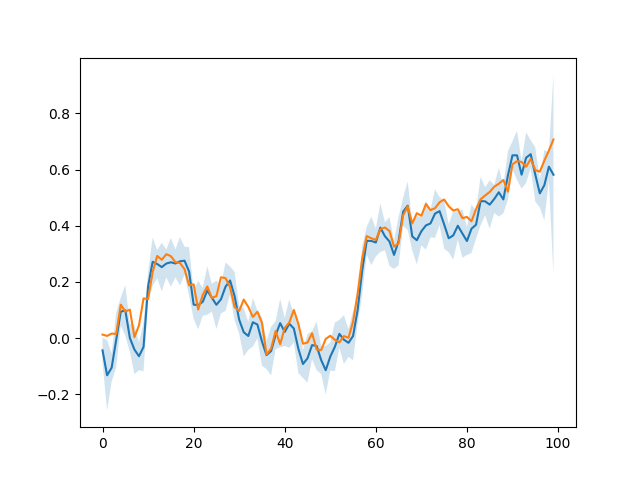

<IPython.core.display.Javascript object>


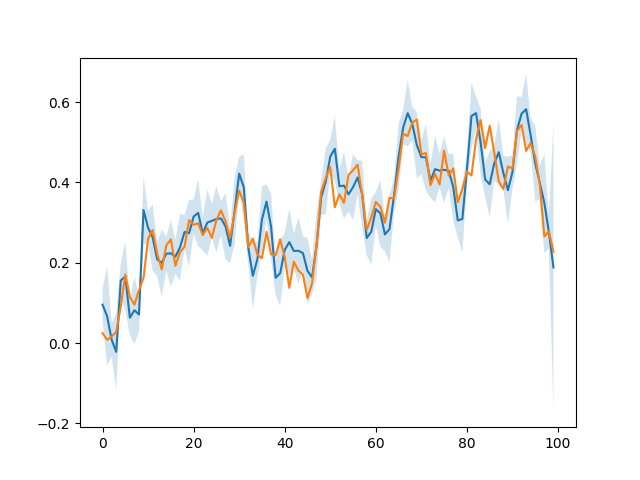

<IPython.core.display.Javascript object>


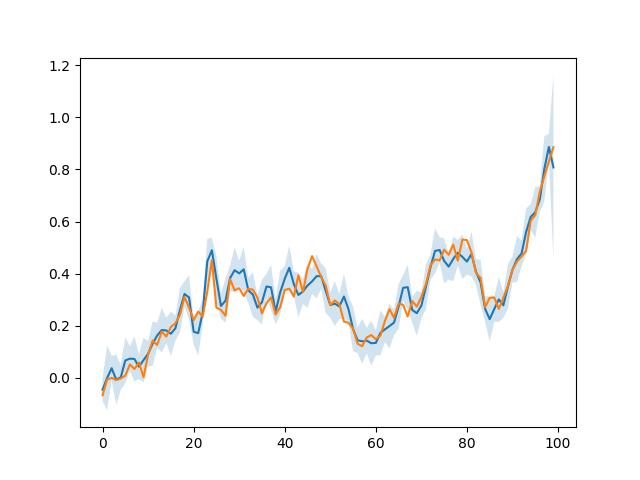

In [3]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
plt.plot(df.index, df['gnd_z'])

plt.show()


<IPython.core.display.Javascript object>


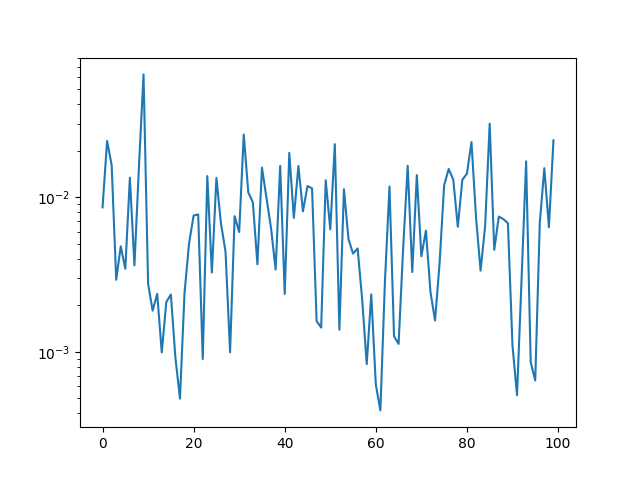

In [4]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)

plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


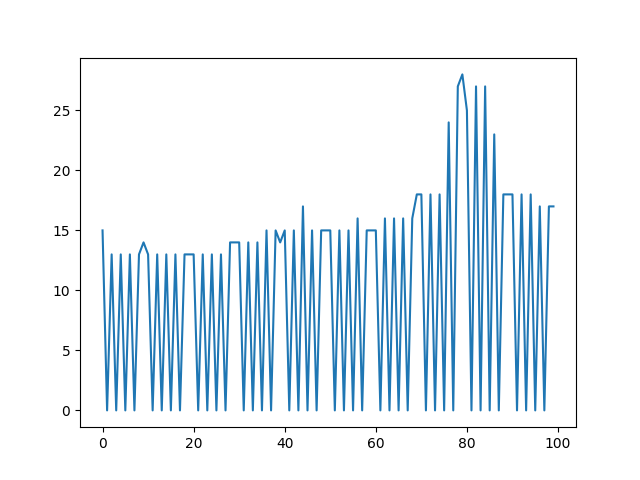

In [5]:
plt.figure()
plt.plot(df.index, df['time'])
plt.show()

In [6]:
anchors = pd.read_csv(prefix+"anchors.csv")
anchors.columns = ['x','y','z']
anchors.head()


,x,y,z
0,-0.487863,-4.347270,2.737160
1,-4.300760,0.133078,2.979340
2,0.134424,-2.106550,1.850130
3,0.802798,8.498710,1.486880
4,4.083850,3.133630,-0.511368


<IPython.core.display.Javascript object>


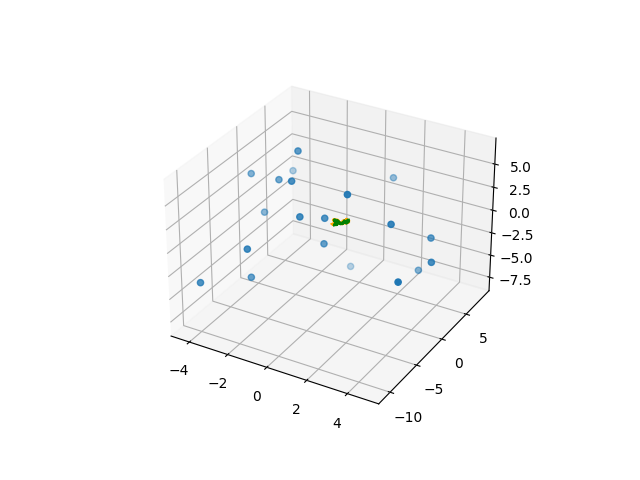

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(anchors['x'], anchors['y'], anchors['z'])
ax.plot(df['x'],df['y'],df['z'], c="orange")
ax.plot(df['gnd_x'],df['gnd_y'],df['gnd_z'], c="green")

